In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt



In [2]:
stocks =['MSFT']
start='2020-01-01'
end='2025-01-01'

In [3]:
def get_data(stocks,start,end):
    
    prices = yf.download(stocks, start  , end , progress=False)['Adj Close']
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    std_returns= returns.std()
    return mean_returns, std_returns, prices

mean_returns, std_returns, prices= get_data(stocks, start, end)
print(mean_returns)
print(std_returns)

0.000987820904046213
0.019211437802711773


In [4]:
Z = np.random.normal(0,1,10)
Z

array([-0.18699706,  0.87537311, -0.06217682, -0.48112037,  1.11471099,
        1.23437732,  1.09840889,  1.33934462,  1.19305068,  0.16838699])

In [5]:
simulated_returns = mean_returns + std_returns * Z
simulated_returns

array([-0.00260466,  0.017805  , -0.00020669, -0.00825519,  0.02240302,
        0.02470198,  0.02208983,  0.02671856,  0.02390804,  0.00422278])

In [6]:
acumulado= np.cumproduct(1 +simulated_returns)
acumulado

array([0.99739534, 1.01515396, 1.01494414, 1.00656558, 1.02911569,
       1.05453689, 1.07783144, 1.10662954, 1.13308688, 1.13787166])

In [7]:
initial_price = prices.iloc[-1]
initial_price

421.5

In [8]:
simulated_prices = initial_price * acumulado
simulated_prices

array([420.40213521, 427.88739394, 427.79895593, 424.26739293,
       433.77226457, 444.48730013, 454.30595124, 466.44435055,
       477.59612067, 479.61290259])

In [9]:
def simular_precios(mean_returns, std_returns, prices, num_dias):
    Z = np.random.normal(0,1,num_dias)
    simulated_returns = mean_returns + std_returns * Z
    acumulado= np.cumproduct(1 +simulated_returns)
    initial_price = prices.iloc[-1]
    simulated_prices = initial_price * acumulado
    return simulated_prices

In [10]:
mean_returns, std_returns, prices= get_data(stocks, start, end)
precios = simular_precios(mean_returns, std_returns, prices, 10)
precios = pd.DataFrame(precios)
precios

,0
0,422.445947
1,421.397932
2,426.579312
3,418.563295
4,415.634782
5,410.824048
6,408.958997
7,411.454622
8,411.694381
9,414.701191


<Axes: >

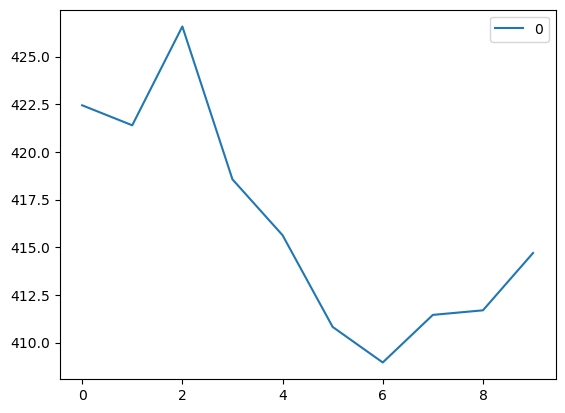

In [11]:
precios.plot()

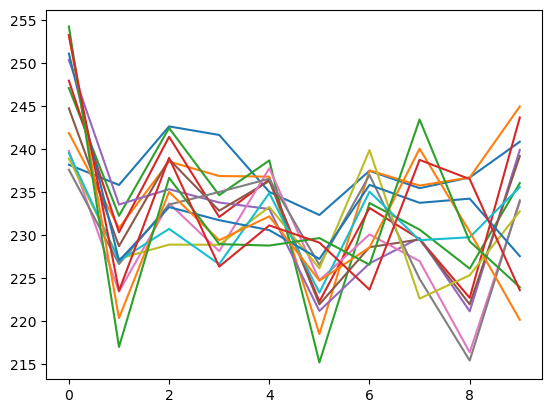

In [13]:
trayectorias_de_precios = np.zeros((10, 14))
mean_returns, std_returns, prices = get_data(["AAPL"], dt.datetime.now() - dt.timedelta( days= 365 * 3  )  , dt.datetime.now() )

for i in range(10):

    precios = simular_precios(mean_returns, std_returns, prices, 14)
    trayectorias_de_precios[i,:] = precios

#trayectorias_de_precios[-1,]
plt.plot(trayectorias_de_precios)